# Generalized Least Squares for Autocorrelation

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/SalesData.csv') #Switch to "SalesData.csv" for autocorrelation example
df.head()
df.dtypes

MonthYear              object
TotalSales              int64
AverageTemperature      int64
TotalPrecip             int64
LocalUE               float64
Recession               int64
Confidence            float64
TERMCBAUTO48NS        float64
UsedCPI               float64
SandP500              float64
DisposibleIncome      float64
GasPrice              float64
FederalFunds          float64
Covid                   int64
GAUsers                 int64
GAPageviews             int64
Leads                   int64
BOBBDC                  int64
NewInventory            int64
UsedInventory           int64
TotalInventory          int64
q2                      int64
q3                      int64
q4                      int64
demand                  int64
dtype: object

In [10]:
xvars = ['AverageTemperature', 'TotalPrecip', 'LocalUE', 'GAUsers', 'Recession', 'TERMCBAUTO48NS', 'UsedCPI', 'BOBBDC', 'TotalInventory', 'q2', 'q3', 'q4']
xvars = ['AverageTemperature', 'TotalPrecip', 'LocalUE', 'GAUsers', 'Recession', 'TERMCBAUTO48NS']
X = df[xvars]
y = df['TotalSales']

In [12]:
OLS_model = sm.OLS(y, X) 
OLS_results = OLS_model.fit()
OLS_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             TotalSales   R-squared (uncentered):                   0.950
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              404.4
Date:                Tue, 23 Jul 2024   Prob (F-statistic):                    3.32e-80
Time:                        17:43:16   Log-Likelihood:                         -638.19
No. Observations:                 133   AIC:                                      1288.
Df Residuals:                     127   BIC:                                      1306.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
AverageTemperature     0.3420      0.156      2.196      0.030       0.034       0.650
TotalPrecip            0.1004      0.032      3.185      0.002       0.038       0.163
LocalUE                1.4792      1.256      1.177      0.241      -1.007       3.965
GAUsers                0.0009      0.000      2.543      0.012       0.000       0.002
Recession            -21.4657     22.034     -0.974      0.332     -65.067      22.135
TERMCBAUTO48NS        14.7616      2.043      7.225      0.000      10.719      18.805
==============================================================================
Omnibus:                        3.988   Durbin-Watson:                   0.733
Prob(Omnibus):                  0.136   Jarque-Bera (JB):                3.999
Skew:                           0.391   Prob(JB):                        0.135
Kurtosis:                       2.669   Cond. No.                     1.26e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
#Durbin-Watson Statistic 
dw_statistic = sm.stats.durbin_watson(OLS_results.resid)
print(f'Durbin-Watson statistic: {dw_statistic}')

Durbin-Watson statistic: 1.497504677234037


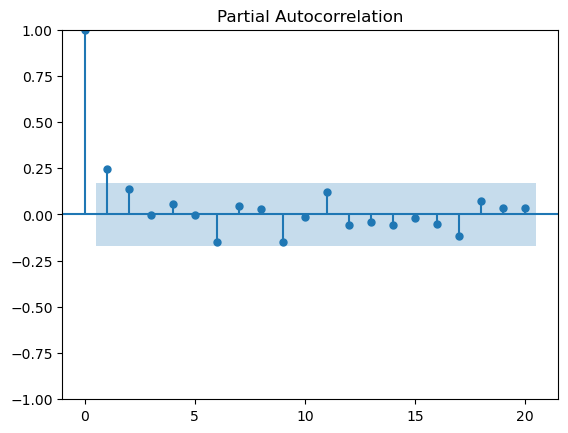

In [24]:
#PACF plot
sm.graphics.tsa.plot_pacf(OLS_results.resid, lags=20)
plt.show()

In [14]:
GLS_model = sm.GLSAR(y, X, rho=1)  #rho is the order of autoregression, per the PACF above
GLS_results = GLS_model.iterative_fit()
GLS_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                GLSAR Regression Results                               
=======================================================================================
Dep. Variable:             TotalSales   R-squared (uncentered):                   0.715
Model:                          GLSAR   Adj. R-squared (uncentered):              0.702
Method:                 Least Squares   F-statistic:                              52.71
Date:                Tue, 23 Jul 2024   Prob (F-statistic):                    4.75e-32
Time:                        17:44:20   Log-Likelihood:                         -586.29
No. Observations:                 132   AIC:                                      1185.
Df Residuals:                     126   BIC:                                      1202.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
AverageTemperature     0.5093      0.194      2.624      0.010       0.125       0.893
TotalPrecip            0.0080      0.019      0.411      0.682      -0.030       0.046
LocalUE                2.3037      2.011      1.145      0.254      -1.677       6.284
GAUsers               -0.0003      0.000     -0.781      0.436      -0.001       0.000
Recession            -48.5477     16.594     -2.926      0.004     -81.386     -15.709
TERMCBAUTO48NS        18.0194      3.027      5.952      0.000      12.028      24.010
==============================================================================
Omnibus:                        8.998   Durbin-Watson:                   2.510
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.834
Skew:                           0.580   Prob(JB):                       0.0121
Kurtosis:                       3.510   Cond. No.                     5.19e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
OLS_params = OLS_results.params
GLS_params = GLS_results.params
param_frame = pd.DataFrame({"OLS": OLS_params, "GLS": GLS_params})
param_frame

,OLS,GLS
AverageTemperature,0.342017,0.509305
TotalPrecip,0.100375,0.007986
LocalUE,1.479170,2.303682
GAUsers,0.000914,-0.000312
Recession,-21.465663,-48.547717
TERMCBAUTO48NS,14.761640,18.019419
